We will import all required libraries below:

In [3]:
import numpy as np
import pandas as pd 
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import seaborn as sns
import plotly.express as px
# Other Libraries were imported on the cells as needed
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

We will load the dataset now:

In [4]:
df=pd.read_csv('DataCoSupplyChainDataset.csv',encoding='latin-1')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

We will now understand dataset details for preprocessing:

In [5]:
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [6]:
df.shape

(180519, 53)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [8]:
df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)', 'Benefit per order', 'Sales per customer', 'Delivery Status', 'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City', 'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id', 'Customer Lname', 'Customer Password', 'Customer Segment', 'Customer State', 'Customer Street', 'Customer Zipcode', 'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market', 'Order City', 'Order Country', 'Order Customer Id', 'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id', 'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price', 'Order Item Profit Ratio', 'Order Item Quantity', 'Sales', 'Order Item Total', 'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status', 'Order Zipcode', 'Product Card Id', 'Product Category Id', 'Product Description', 'Product Image', 'Product Name', 'Product Price', 'Product Status',
       'shipping d

In [9]:
df.select_dtypes(include = "object").columns

Index(['Type', 'Delivery Status', 'Category Name', 'Customer City', 'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Lname', 'Customer Password', 'Customer Segment', 'Customer State', 'Customer Street', 'Department Name', 'Market', 'Order City', 'Order Country', 'order date (DateOrders)', 'Order Region', 'Order State', 'Order Status', 'Product Image', 'Product Name', 'shipping date (DateOrders)', 'Shipping Mode'], dtype='object')

In [10]:
df.select_dtypes(include=["int64","float64"]).columns

Index(['Days for shipping (real)', 'Days for shipment (scheduled)', 'Benefit per order', 'Sales per customer', 'Late_delivery_risk', 'Category Id', 'Customer Id', 'Customer Zipcode', 'Department Id', 'Latitude', 'Longitude', 'Order Customer Id', 'Order Id', 'Order Item Cardprod Id', 'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price', 'Order Item Profit Ratio', 'Order Item Quantity', 'Sales', 'Order Item Total', 'Order Profit Per Order', 'Order Zipcode', 'Product Card Id', 'Product Category Id', 'Product Description', 'Product Price', 'Product Status'], dtype='object')

Dealing with null and duplicate values:

In [11]:
print('Dataset Details:')
print(f"Dataset has {df.shape[0]} rows and {df.shape[1]} columns")
print(f"Duplicates: {df.duplicated().sum()}")
print(f"Total Missing Values: {df.isna().sum().sum()}")
print(f"Number of rows with missing values: {df.isna().any(axis=1).sum()}")

Dataset Details:
Dataset has 180519 rows and 53 columns
Duplicates: 0
Total Missing Values: 336209
Number of rows with missing values: 180519


No duplicate values to remove.

In [12]:
df.isnull().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


No need to fill or individually replace the null values because these columns with null values won't affect the Sales prediction.

Instead, only the revelant features will be considered.

Dropping Irrelevant columns

In [13]:
features = ['Type', 'Benefit per order', 'Sales per customer',  'Delivery Status', 'Late_delivery_risk', 'Category Name', 'Customer City', 'Customer Country',   'Customer Id', 'Customer Segment',  'Customer State', 'Customer Zipcode', 'Department Name', 'Latitude', 'Longitude', 'Market', 'Order City', 'Order Country', 'Order Customer Id', 'order date (DateOrders)', 'Order Id',  'Order Item Cardprod Id', 'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',  'Order Item Product Price', 'Order Item Profit Ratio', 'Order Item Quantity', 'Sales', 'Order Item Total',  'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status', 'Order Zipcode', 'Product Card Id', 'Product Category Id', 'Product Description', 'Product Image', 'Product Name', 'Product Price', 'Product Status','shipping date (DateOrders)', 'Shipping Mode']

In [14]:
# Showing the features to be included in the predication
data = df[features]
data.head()

,Type,Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Customer Zipcode,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,91.250000,314.640015,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,20755,Consumer,PR,725.0,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,-249.089996,311.359985,Late delivery,1,Sporting Goods,Caguas,Puerto Rico,19492,Consumer,PR,725.0,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,-247.779999,309.720001,Shipping on time,0,Sporting Goods,San Jose,EE. UU.,19491,Consumer,CA,95125.0,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,22.860001,304.809998,Advance shipping,0,Sporting Goods,Los Angeles,EE. UU.,19490,Home Office,CA,90027.0,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,134.210007,298.250000,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,19489,Corporate,PR,725.0,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


Exploratory Data Analysis (EDA) and Sales Visualization:

In [15]:
#Order Country
df_sales_country=data.groupby(['Order Country'])['Sales'].sum().reset_index(name='Sales of Orders').sort_values(by= 'Sales of Orders', ascending= False)
px.bar(df_sales_country.head(10), x='Sales of Orders',y = 'Order Country',color ='Sales of Orders')

In [16]:
#Product
df_sales_country=data.groupby([ 'Product Name'])['Sales'].sum().reset_index(name='Sales of Orders').sort_values(by= 'Sales of Orders', ascending= False)
px.bar(df_sales_country.head(10), x='Sales of Orders',y = 'Product Name',color ='Sales of Orders')

In [17]:
#Product and delivery status
df_sales_pd=data.groupby([ 'Product Name', 'Delivery Status'])['Sales'].sum().reset_index(name='Sales of Orders').sort_values(by= 'Sales of Orders', ascending= False)
px.bar(df_sales_pd.head(10), x='Sales of Orders',y = 'Product Name',color ='Delivery Status')

In [18]:
#Product and order region
df_sales_pr=data.groupby([ 'Product Name', 'Order Region'])['Sales'].sum().reset_index(name='Sales of Orders').sort_values(by= 'Sales of Orders', ascending= False)
px.bar(df_sales_pr.head(10), x='Sales of Orders',y = 'Product Name',color ='Order Region')

In [19]:
#Category Name
df_sales_pr=data.groupby([  'Category Name'])['Sales'].sum().reset_index(name='Sales of Orders').sort_values(by= 'Sales of Orders', ascending= False)
px.bar(df_sales_pr.head(10), x='Sales of Orders',y = 'Category Name',color ='Sales of Orders')

In [20]:
#Type of payment
df_sales_pr=data.groupby([ 'Type'])['Sales'].sum().reset_index(name='Sales of Orders').sort_values(by= 'Sales of Orders', ascending= False)
px.bar(df_sales_pr.head(10), x='Sales of Orders',y = 'Type',color ='Sales of Orders')

In [21]:
# Visualization of Payment Types for each Product's Sales Orders
df_sales_tp=data.groupby([ 'Type', 'Product Name'])['Sales'].sum().reset_index(name='Sales of Orders').sort_values(by= 'Sales of Orders', ascending= False)
px.bar(df_sales_tp.head(10), x='Sales of Orders',y = 'Type',color ='Product Name')

Dealing with DateOrders using Datetime:

In [22]:
# Features to be included are DateOrders and Sales
import datetime as dt
data_orderdate=data[['order date (DateOrders)', 'Sales']]
data_orderdate['order_date'] = pd.to_datetime(data_orderdate['order date (DateOrders)'])

In [23]:
# Separating the date of orders Quarterly, Monthly and Yearly
data_orderdate["Quarter"] = data_orderdate['order_date'].dt.quarter
data_orderdate["Month"] = data_orderdate['order_date'].dt.month
data_orderdate["year"] = data_orderdate['order_date'].dt.year

Sales Visualizations by Order Dates:

In [24]:
# Visualization of the Annually Orders
data_orderdate['YearStr']=data_orderdate['year'].astype(str)
df_sales_year=data_orderdate.groupby([ 'YearStr'])['Sales'].sum().reset_index(name='Sales of Orders').sort_values(by= 'Sales of Orders', ascending= False)
px.bar(df_sales_year, x='Sales of Orders',y = 'YearStr',color ='Sales of Orders')

In [25]:
# Visualization of the Quarterly Orders
data_orderdate['QuarterStr']=data_orderdate['Quarter'].astype(str)
df_sales_quarter=data_orderdate.groupby([ 'YearStr','QuarterStr'])['Sales'].sum().reset_index(name='Sales of Orders').sort_values(by= 'Sales of Orders', ascending= False)
px.bar(df_sales_quarter, x='Sales of Orders',y = 'QuarterStr',color ='YearStr')

In [26]:
# Visualization of the Monthly Orders
data_orderdate['MonthStr']=data_orderdate['Month'].astype(str)
df_sales_m=data_orderdate.groupby([ 'QuarterStr', 'MonthStr'])['Sales'].sum().reset_index(name='Sales of Orders').sort_values(by= 'Sales of Orders', ascending= False)
px.bar(df_sales_m, x='Sales of Orders',y = 'QuarterStr',color ='MonthStr')

Sales Prediction:

In [27]:
# Dataframe for the Sales Prediction
data_sales =df[['Type', 'Benefit per order', 'Sales per customer',  'Delivery Status', 'Late_delivery_risk', 'Category Name', 'Customer City', 'Customer Country',   'Customer Id', 'Customer Segment',  'Customer State', 'Customer Zipcode', 'Department Name', 'Latitude', 'Longitude', 'Market', 'Order City', 'Order Country', 'Order Customer Id', 'order date (DateOrders)', 'Order Id',  'Order Item Cardprod Id', 'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',  'Order Item Product Price', 'Order Item Profit Ratio', 'Order Item Quantity', 'Sales', 'Order Item Total',  'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status', 'Order Zipcode', 'Product Card Id', 'Product Category Id', 'Product Description', 'Product Image', 'Product Name', 'Product Price', 'Product Status','shipping date (DateOrders)', 'Shipping Mode']]

In [28]:
# Removing irrelevant features
features=data_sales.drop(columns=['Sales', 'Order Item Quantity', 'Order Item Product Price'])
target=data_sales['Sales']

Applying LabelEncoder for the features:

In [29]:
#Label Encoder will transform/change Categorical data to Numerical
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
def Labelencoder_feature(x):
    le=LabelEncoder()
    x=le.fit_transform(x)
    return x
features=features.apply(Labelencoder_feature)

Feature Engineering using f_regression:

In [30]:
#Using f_regression the relevance of the features can be checked
from sklearn.feature_selection import f_regression
F_values, p_values  = f_regression(features, target)

In [31]:
import itertools
f_reg = [(i, v, z) for i, v, z in itertools.zip_longest(features.columns, F_values,  ['%.3f' % p for p in p_values])]
f_reg=pd.DataFrame(f_reg, columns=['Variable','F_Value', 'P_Value'])

In [32]:
f_reg=pd.DataFrame(f_reg, columns=['Variable','F_Value', 'P_Value'])
f_reg = f_reg.sort_values(by=['P_Value'])
f_reg.P_Value= f_reg.P_Value.astype(float)
f_reg=f_reg[f_reg.P_Value<0.05]
f_reg

,Variable,F_Value,P_Value
20,Order Id,1165.171704,0.000
22,Order Item Discount,57166.125441,0.000
21,Order Item Cardprod Id,12782.968321,0.000
39,shipping date (DateOrders),142.652140,0.000
19,order date (DateOrders),128.461963,0.000
18,Order Customer Id,673.464036,0.000
27,Order Profit Per Order,13782.670150,0.000
15,Market,240.910781,0.000
28,Order Region,140.517795,0.000
29,Order State,27.929090,0.000


In [33]:
f_reg_features=f_reg.Variable.values
f_reg_features

array(['Order Id', 'Order Item Discount', 'Order Item Cardprod Id',
       'shipping date (DateOrders)', 'order date (DateOrders)',
       'Order Customer Id', 'Order Profit Per Order', 'Market',
       'Order Region', 'Order State', 'Order Item Total',
       'Department Name', 'Product Card Id', 'Customer Id',
       'Product Category Id', 'Product Image', 'Category Name',
       'Product Name', 'Product Price', 'Sales per customer',
       'Benefit per order', 'Order Zipcode', 'Order Item Id',
       'Order City', 'Customer Segment'], dtype=object)

In [34]:
final_features=features[f_reg_features]

In [35]:
final_features

,Order Id,Order Item Discount,Order Item Cardprod Id,shipping date (DateOrders),order date (DateOrders),Order Customer Id,Order Profit Per Order,Market,Order Region,Order State,Order Item Total,Department Name,Product Card Id,Customer Id,Product Category Id,Product Image,Category Name,Product Name,Product Price,Sales per customer,Benefit per order,Order Zipcode,Order Item Id,Order City,Customer Segment
0,65749,426,114,27149,5961,20649,18934,3,15,475,2568,4,114,20649,47,78,40,78,62,2568,18934,609,180516,331,0
1,64486,498,114,2209,1147,19386,2272,3,13,841,2559,4,114,19386,47,78,40,78,62,2559,2272,609,179253,391,0
2,64485,529,114,1980,1146,19385,2293,3,13,841,2555,4,114,19385,47,78,40,78,62,2555,2293,609,179252,391,0
3,64484,600,114,1752,1145,19384,13638,3,11,835,2546,4,114,19384,47,78,40,78,62,2546,13638,609,179251,3226,2
4,64483,682,114,1528,1144,19383,20599,3,11,835,2526,4,114,19383,47,78,40,78,62,2526,20599,609,179250,3226,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180514,21755,0,96,2733,1774,992,15208,3,7,913,2752,3,96,992,30,24,18,24,66,2752,15208,609,65176,2922,2
180515,21750,176,96,2339,1758,9066,422,3,7,770,2743,3,96,9066,30,24,18,24,66,2743,422,609,65160,1362,1
180516,21740,300,96,2727,1526,288,20768,3,11,88,2734,3,96,288,30,24,18,24,66,2734,20768,609,65128,25,1
180517,21738,404,96,2114,1524,2781,21463,3,11,88,2725,3,96,2781,30,24,18,24,66,2725,21463,609,65125,25,0


In [36]:
final_data=pd.concat([final_features, target], axis=1)

Visualization of the Final Data correlation using Heatmap:

<Axes: >

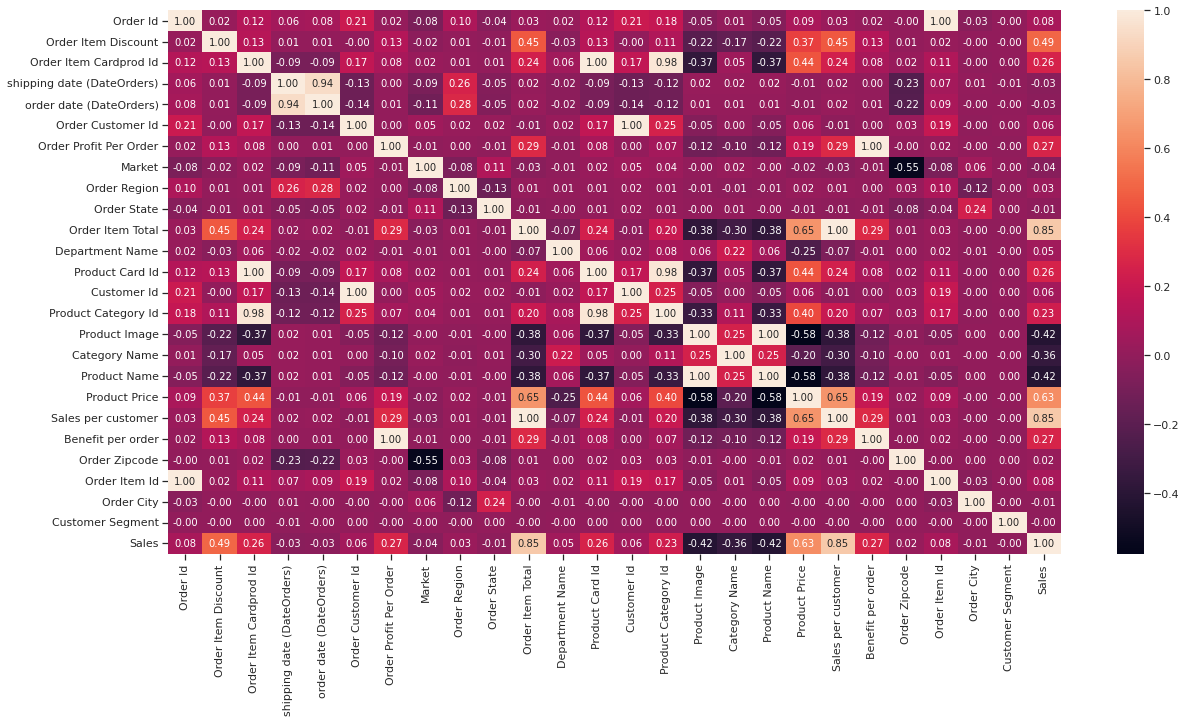

In [37]:
fig = plt.figure(figsize=(20,10))
sns.heatmap(final_data.corr(), annot = True, fmt = '.2f')

Modelling using RandomForestRegressor:

In [38]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_features, target, test_size = 0.3, random_state = 42)

In [ ]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [ ]:
rf_pred = pd.DataFrame({'actual' : y_test,
                                 'predicted' : rf.predict(X_test)})
rf_pred.head()

Model Evaluation to measure performance using multiple metrics:

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
r2_score(y_test, y_pred_rf, multioutput='uniform_average')

In [ ]:
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_score_rf = r2_score(y_test, y_pred_rf, multioutput='uniform_average')
print("MAE:",mae_rf)
print("MSE:", mse_rf)
print("RMSE:", rmse_rf)
print("r2_score:", r2_score_rf)

In [ ]:
#Visualization of the Results
plt.figure(figsize=(10,8))
plt.scatter(y_test, y_pred_rf, c='crimson')
plt.yscale('log')
plt.xscale('log')
p1 = max(max(y_pred_rf), max(y_test))
p2 = min(min(y_pred_rf), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [ ]:
xgb_reg = XGBRegressor(learning_rate=1.0, max_depth=6, min_child_weight=40, seed=0)

xgb_reg.fit(X_train, y_train)
y_pred_xgb = xgb_reg.predict(X_test)

In [ ]:
r2_score(y_test, y_pred_xgb, multioutput='uniform_average')

In [ ]:
xgb_pred = pd.DataFrame({'actual' : y_test,
                                 'predicted' : xgb_reg.predict(X_test)})
xgb_pred.head()

In [ ]:
#Visualization of the Results
plt.figure(figsize=(10,8))
plt.scatter(y_test, y_pred_xgb, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred_xgb), max(y_test))
p2 = min(min(y_pred_xgb), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [ ]:
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_score_xgb = r2_score(y_test, y_pred_xgb, multioutput='uniform_average')
print("MAE:",mae_xgb)
print("MSE:", mse_xgb)
print("RMSE:", rmse_xgb)
print("r2_score:", r2_score_xgb)